In [1]:
from utils.binaries import *
from utils.plotting import *

08:52:29 (   +1.0s) [INFO   ] -- import logging
08:52:29 (   +95ms) [INFO   ] -- import numpy as np
08:52:29 (    +9ms) [INFO   ] -- import uncertainties
08:52:30 (  +229ms) [INFO   ] -- import pandas as pd
08:52:30 (    +1ms) [WARNING] -- pandas support to be dropped at some point!
08:52:30 (    +2ms) [INFO   ] -- import binaries.tools as tools
08:52:30 (  +268ms) [INFO   ] -- import matplotlib.pyplot as plt
08:52:30 (  +321ms) [INFO   ] -- import seaborn as so
08:52:30 (    +2ms) [INFO   ] -- import plotting.tools as plot
08:52:30 (    +5ms) [DEBUG  ] -- font size set to 9.5
08:52:30 (    +2ms) [DEBUG  ] -- label size set to 13.0
08:52:30 (    +0ms) [DEBUG  ] -- figure size set to [6.6, 3.3]
08:52:30 (    +1ms) [DEBUG  ] -- markersize set to 2.0
08:52:30 (    +1ms) [DEBUG  ] -- usetex set to False


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


(30.0, 180.0)

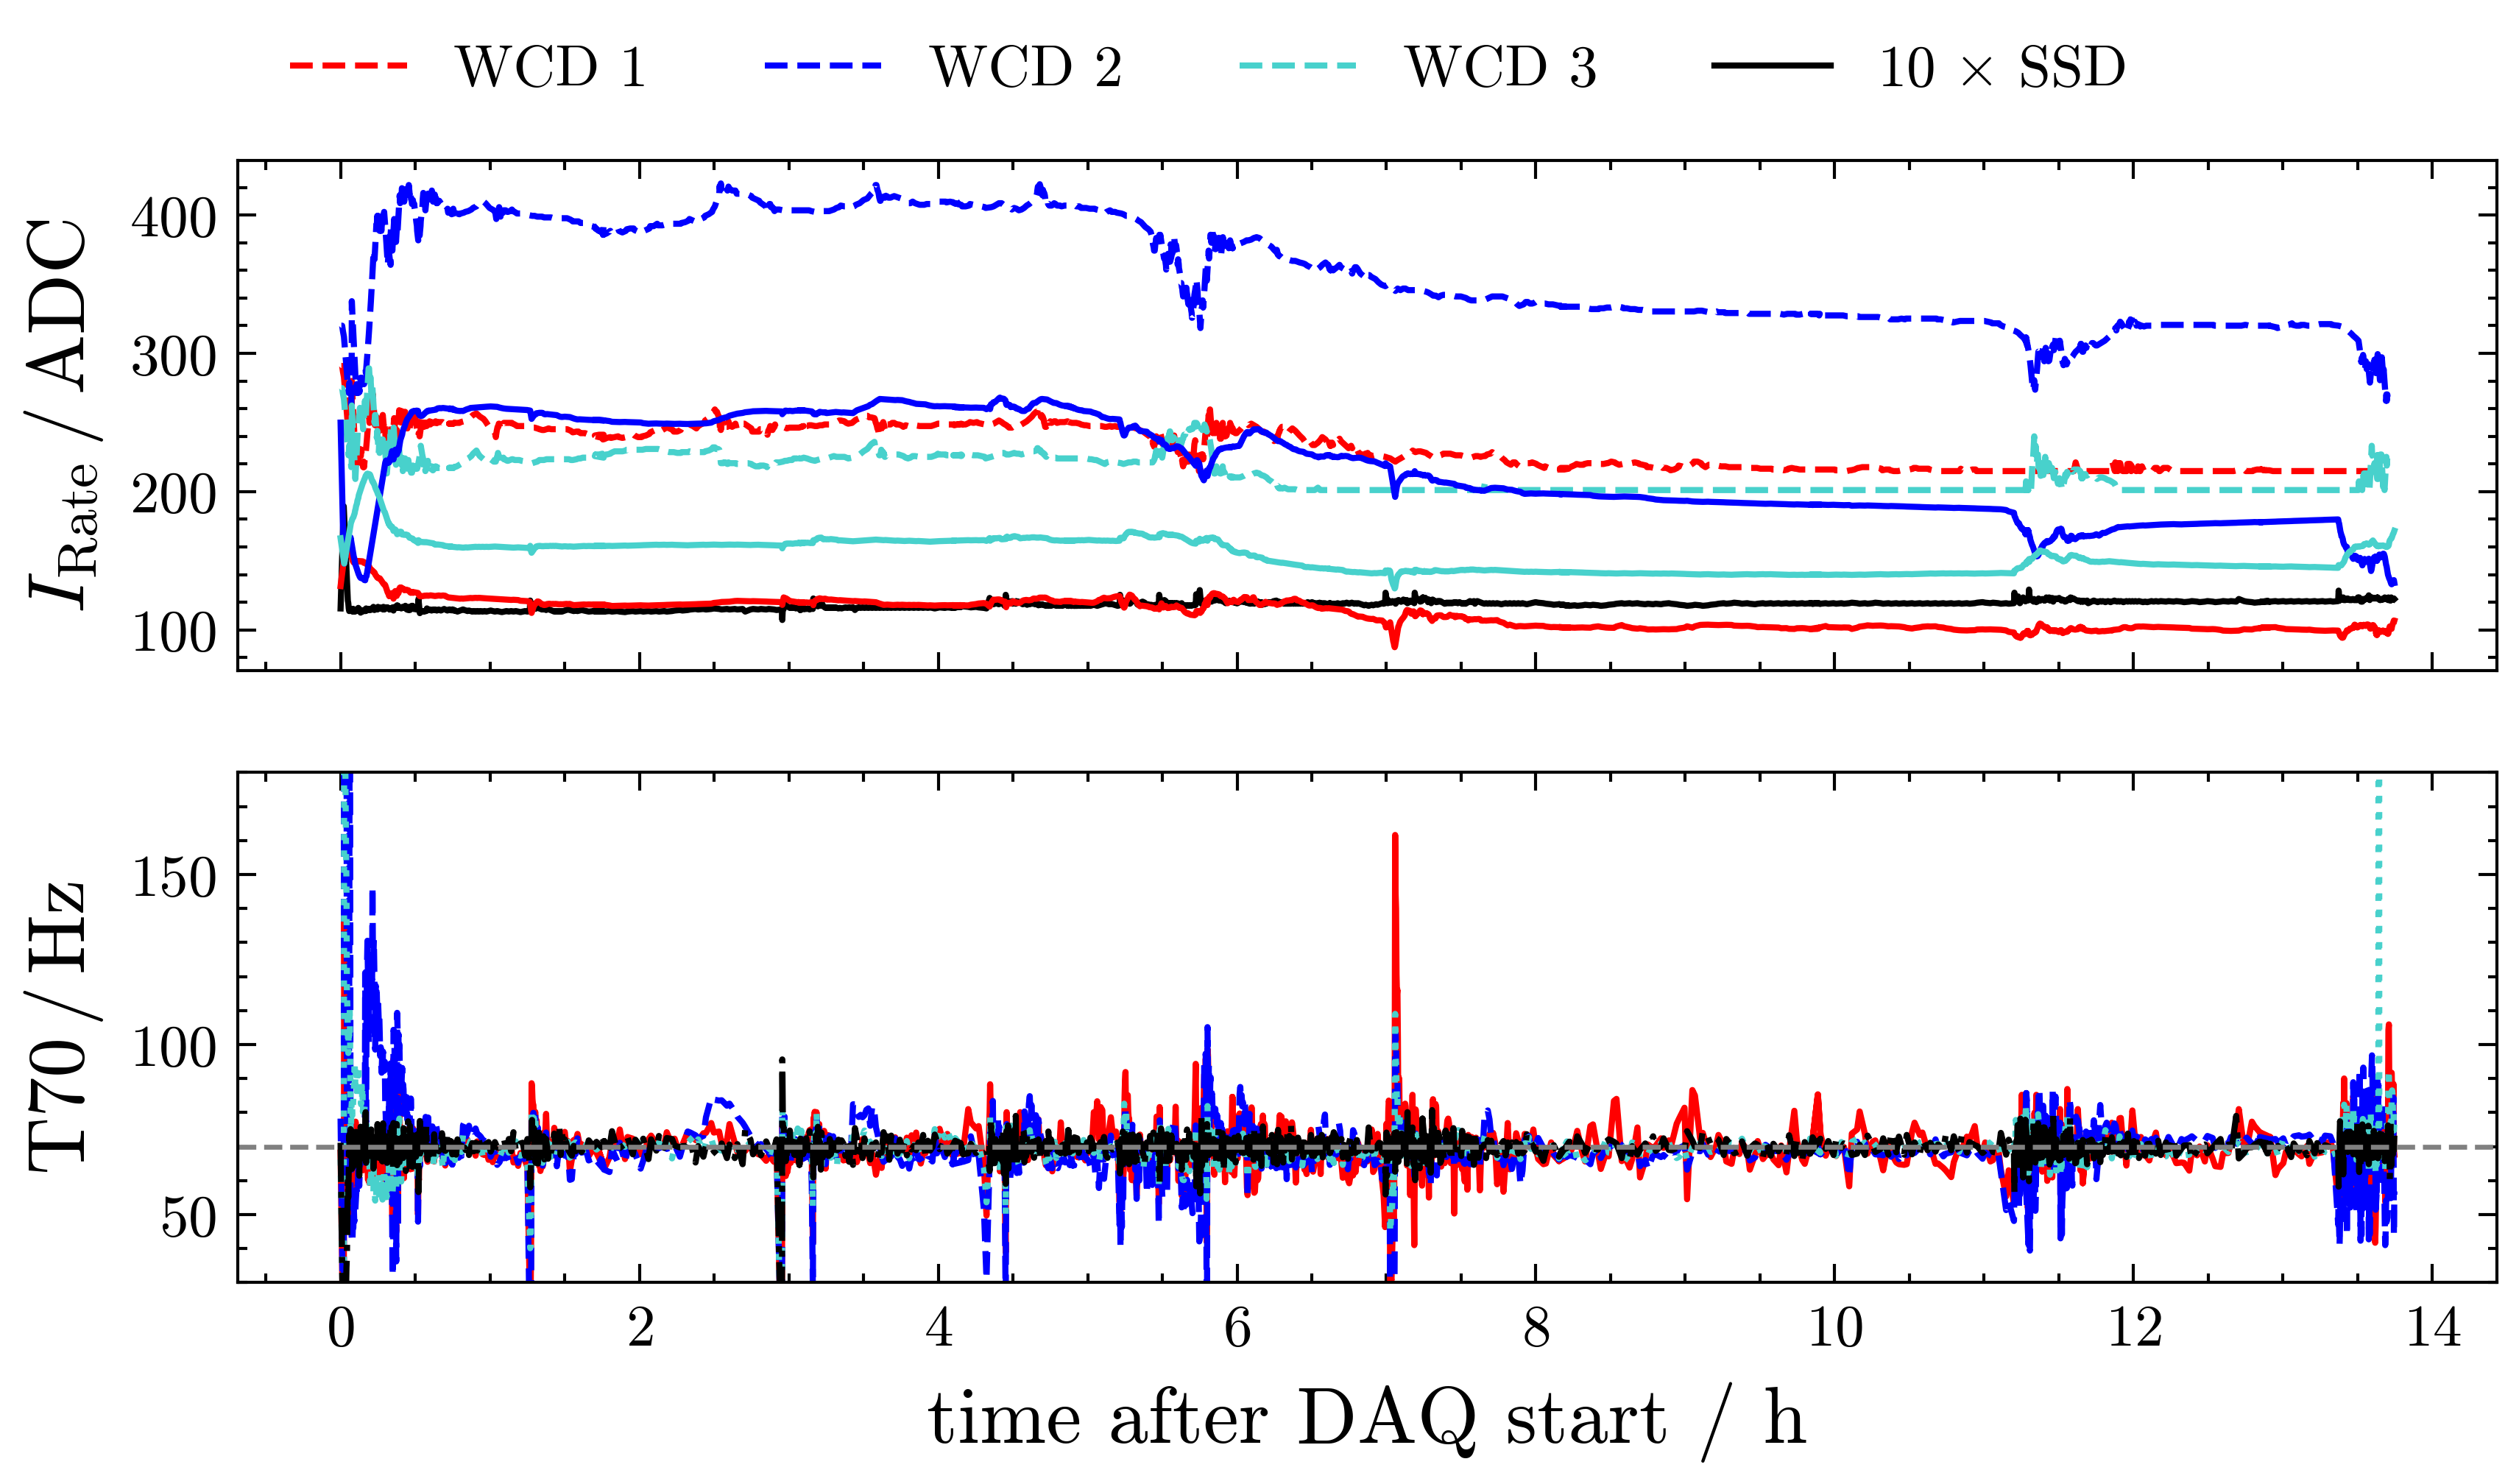

In [5]:
t, wcd1, hz1, wcd2, hz2, wcd3, hz3, ssd, hz4 = np.loadtxt('/cr/data01/filip/Data/daqIntegrationTests/v13/calib.test', unpack=True)
nan_mask = np.isnan(t)

t[nan_mask] = np.interp(np.flatnonzero(nan_mask), np.flatnonzero(~nan_mask), t[~nan_mask])
muonfill = lambda x: x[~nan_mask]
xb = lambda x: x[nan_mask]

ssd  /= 2.64 * 10
wcd1[nan_mask] /= 1.75
wcd2[nan_mask] /= 1.75
wcd3[nan_mask] /= 1.75
wcd1[~nan_mask] /= 10
wcd2[~nan_mask] /= 10
wcd3[~nan_mask] /= 10
t = (t - t[0]) / 3600

start, stop, skip = 0, -1, 1

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
ax1.plot(xb(t)[start:stop:skip], xb(wcd1)[start:stop:skip], label="WCD 1", ls='--', c='r')
ax1.plot(xb(t)[start:stop:skip], xb(wcd2)[start:stop:skip], label="WCD 2", ls='--', c='b')
ax1.plot(xb(t)[start:stop:skip], xb(wcd3)[start:stop:skip], label="WCD 3", ls='--', c='mediumturquoise')
ax1.plot(muonfill(t)[start:stop:skip], 10 * muonfill(ssd)[start:stop:skip], label=r"10$\,\times\,$SSD", c='k')
ax2.legend()

ax1.plot(muonfill(t)[start:stop:skip], muonfill(wcd1)[start:stop:skip], ls='solid', c='r')
ax1.plot(muonfill(t)[start:stop:skip], muonfill(wcd2)[start:stop:skip], ls='solid', c='b')
ax1.plot(muonfill(t)[start:stop:skip], muonfill(wcd3)[start:stop:skip], ls='solid', c='mediumturquoise')

ax2.plot(muonfill(t)[start:stop:skip], muonfill(hz1)[start:stop:skip], c='r')
ax2.plot(muonfill(t)[start:stop:skip], muonfill(hz2)[start:stop:skip], c='b')
ax2.plot(muonfill(t)[start:stop:skip], muonfill(hz3)[start:stop:skip], c='mediumturquoise')
ax2.plot(muonfill(t)[start:stop:skip], muonfill(hz4)[start:stop:skip], c='k')

ax2.axhline(70, ls='--', lw=0.8, c='gray') 
ax1.legend(bbox_to_anchor=(0, 1.02,1,0.2), loc="lower left", ncol=4)
ax1.set_ylabel("$I_\mathrm{Rate}\,/\,\mathrm{ADC}$")
ax2.set_ylabel("$\mathrm{T}70\,/\,\mathrm{Hz}$")
ax2.set_xlabel("time after DAQ start / h")
ax2.set_ylim(30, 180)

Text(0.5, 0, 'T70 / Hz')

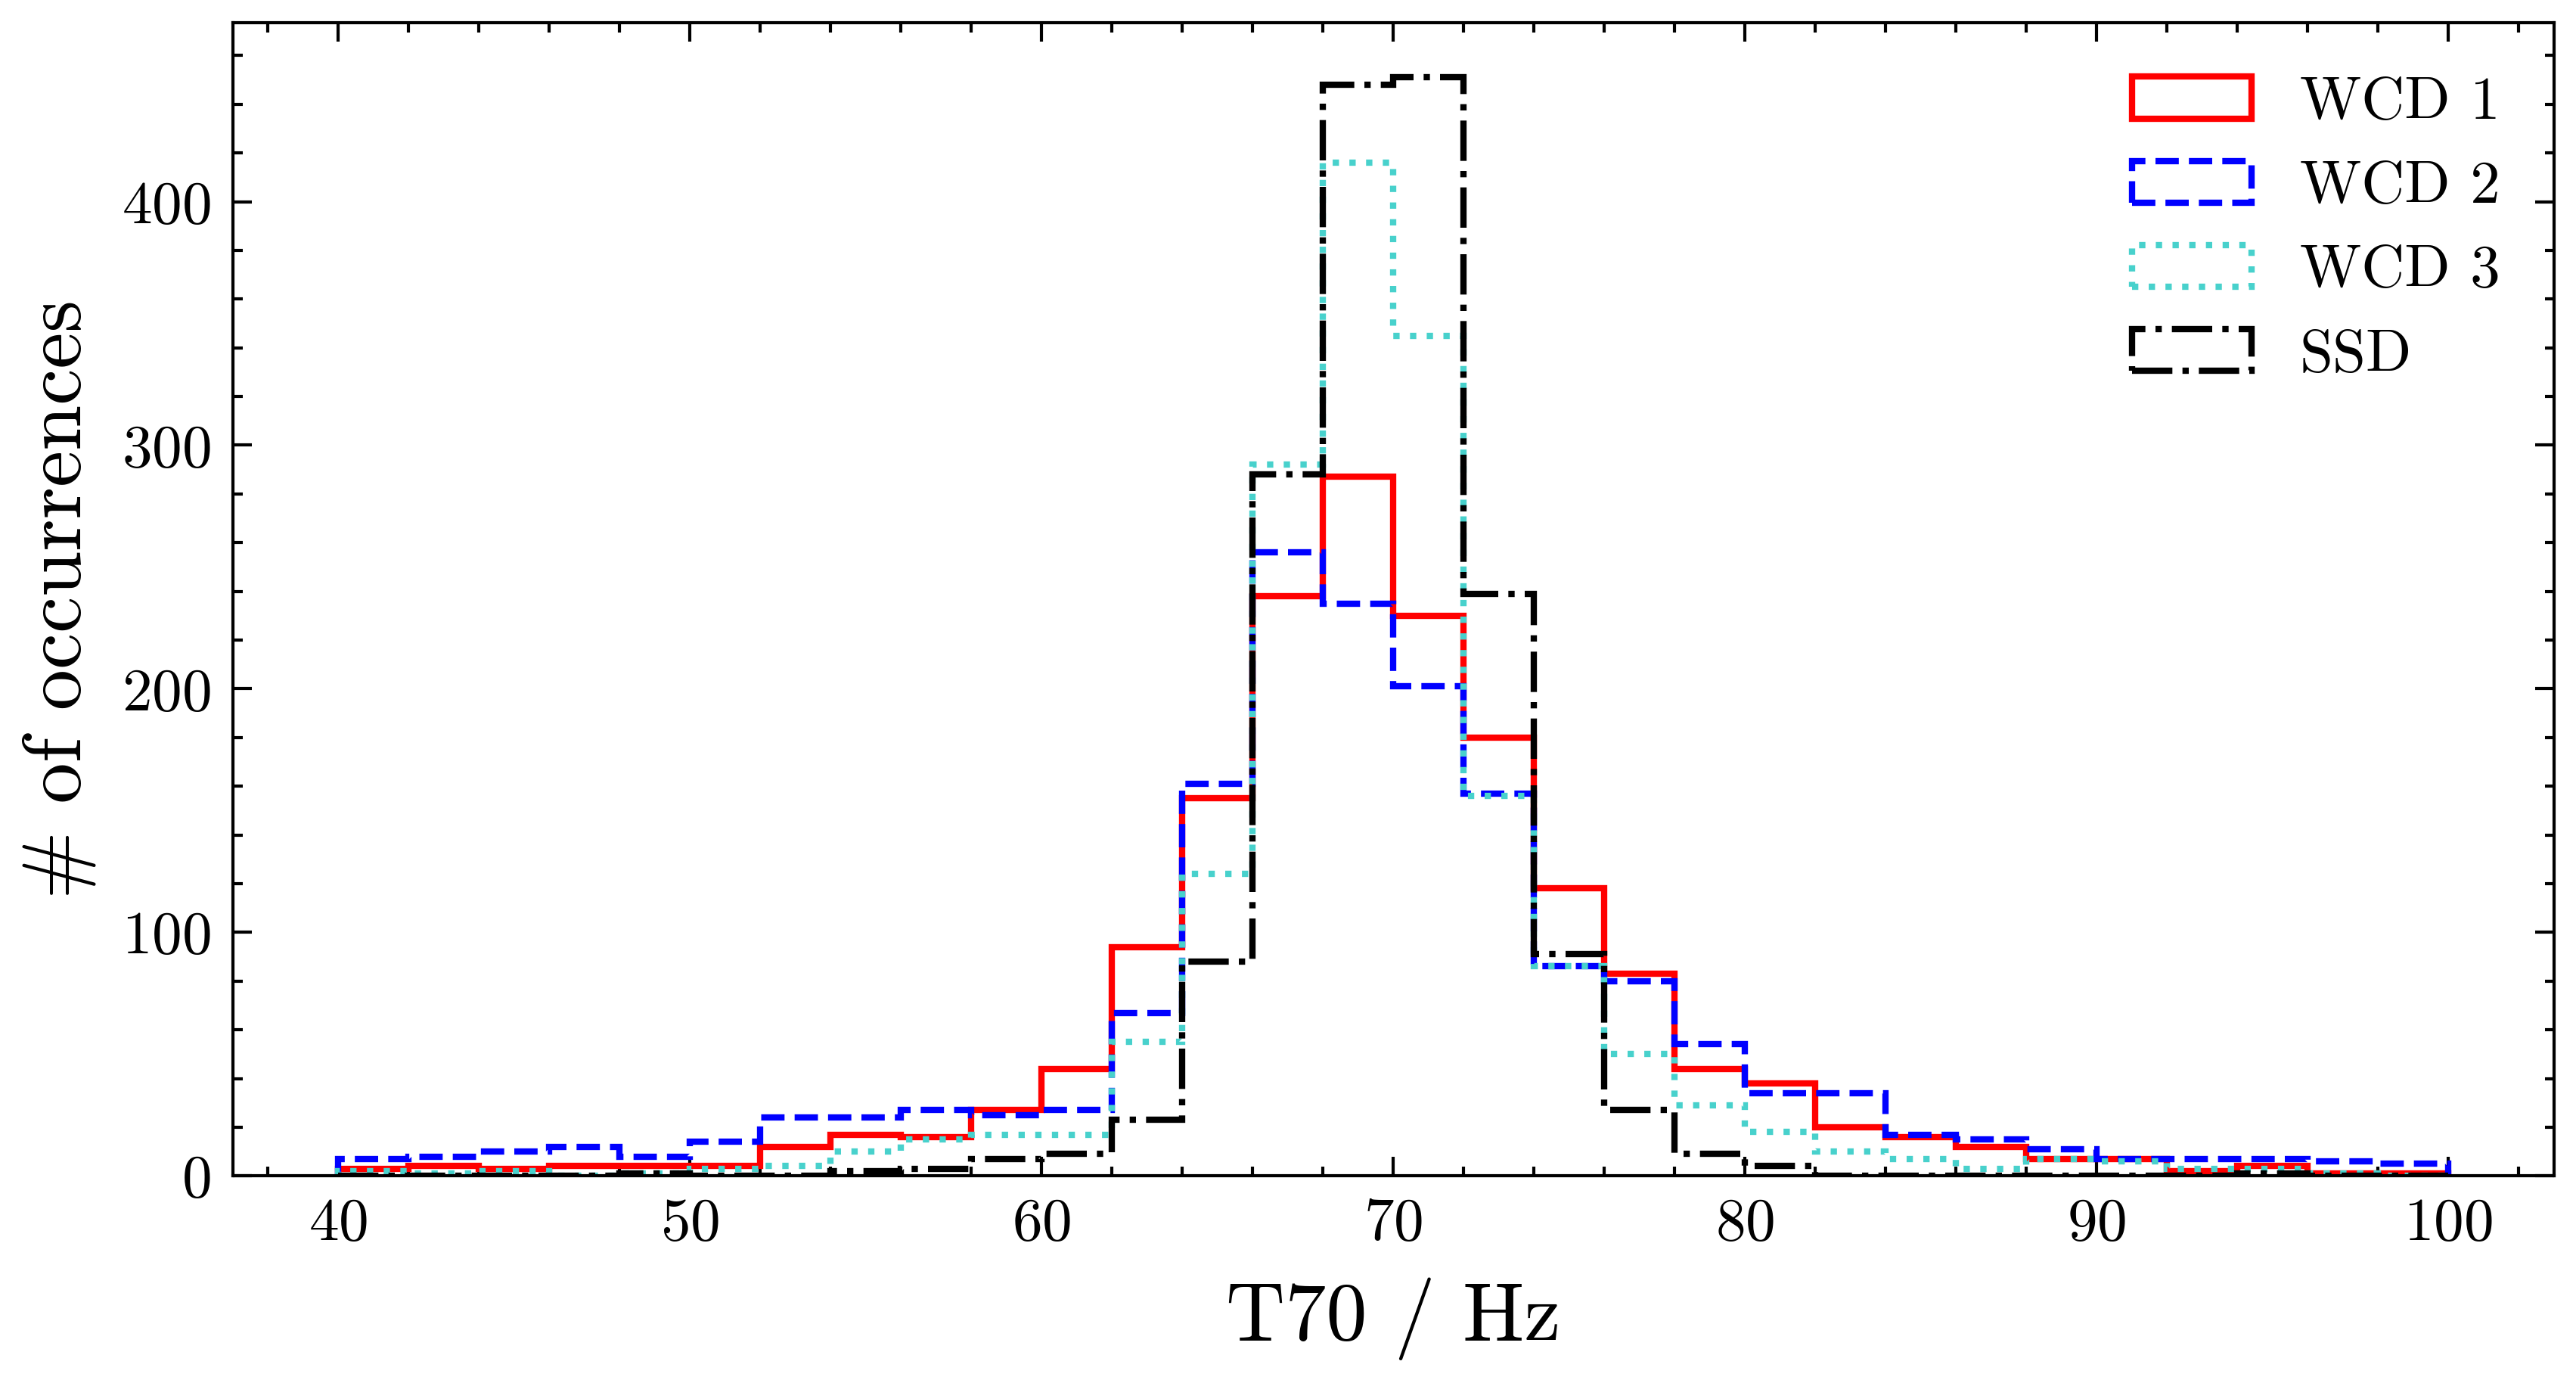

In [3]:
_ = plt.hist(muonfill(hz1), range=(40, 100), bins=30, histtype='step', color='r', label=fr'WCD 1')
_ = plt.hist(muonfill(hz2), range=(40, 100), bins=30, histtype='step', color='b', label='WCD 2')
_ = plt.hist(muonfill(hz3), range=(40, 100), bins=30, histtype='step', color='mediumturquoise', label='WCD 3')
_ = plt.hist(muonfill(hz4), range=(40, 100), bins=30, histtype='step', color='k', label='SSD')

plt.legend()
plt.ylabel('# of occurrences')
plt.xlabel('T70 / Hz')

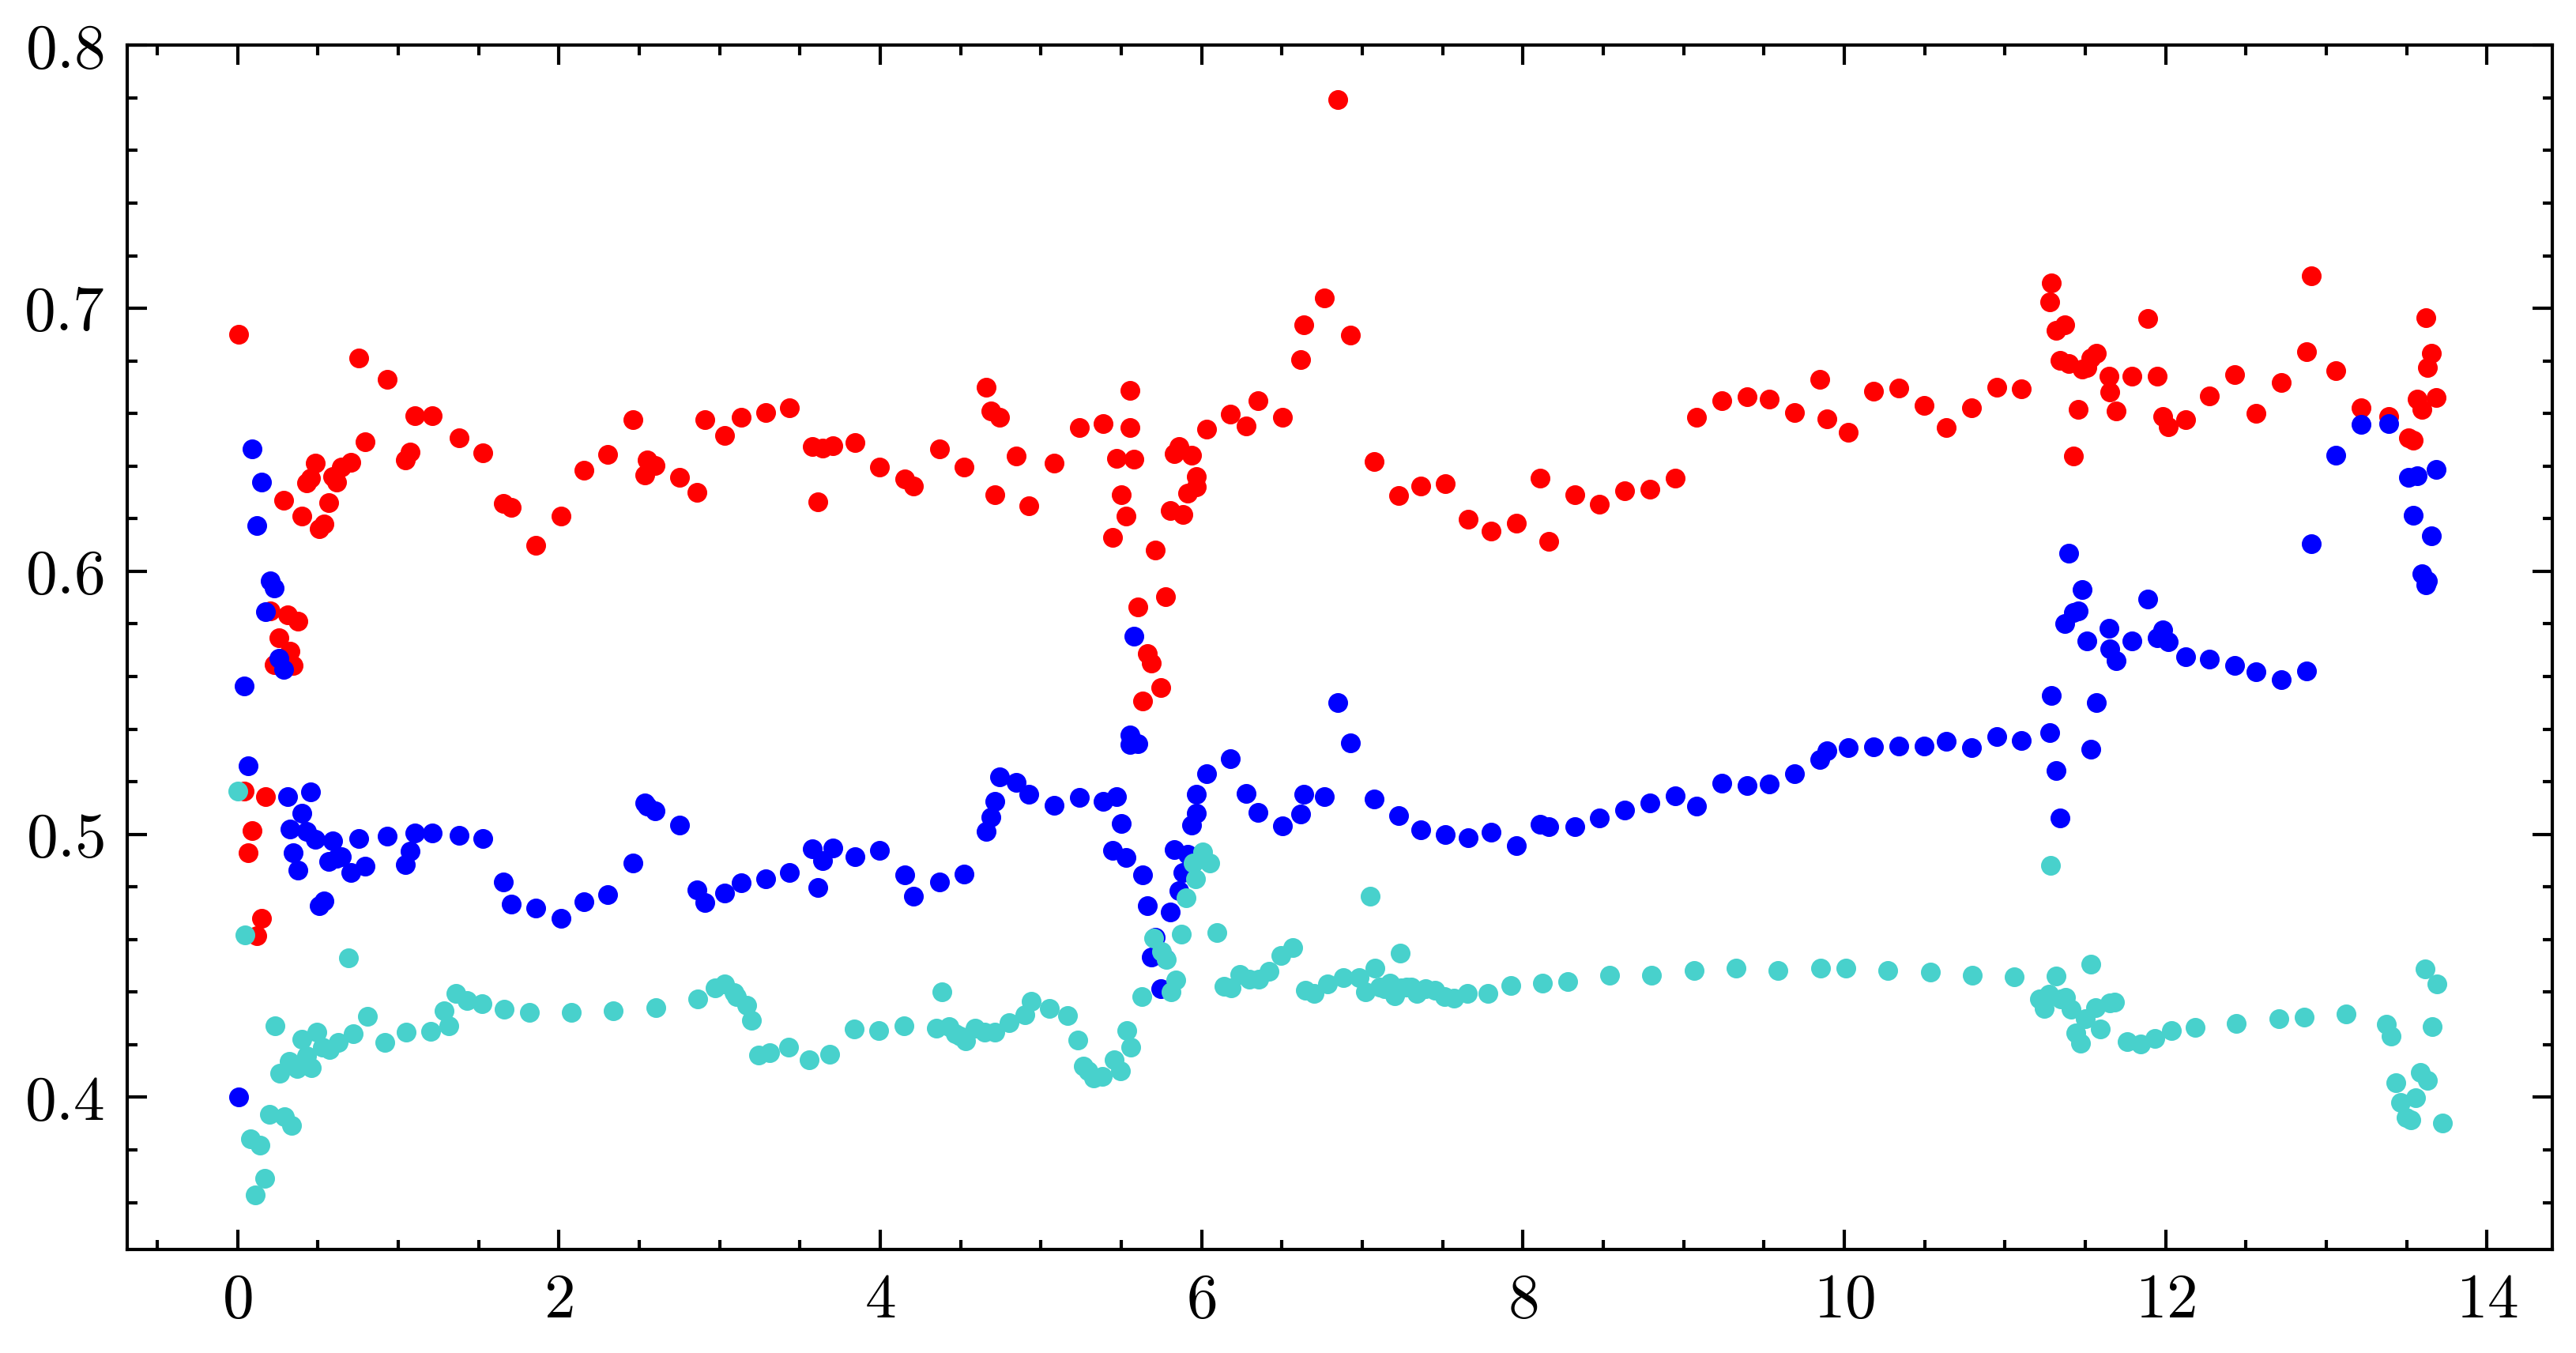

In [4]:
r1 = xb(wcd1)[::9] / muonfill(wcd1)[::10]
r2 = xb(wcd2)[::9] / muonfill(wcd2)[::10]
r3 = xb(wcd3)[::9] / muonfill(wcd3)[::10]

plt.scatter(xb(t)[::9], r1, c='r')
plt.scatter(xb(t)[::9], r2, c='b')
plt.scatter(muonfill(t)[::10], r3, c='mediumturquoise')